# MLE (Estimacion de maxima verosimilitud - Maximum likelihood Estimation)
- Es un framework para estimacion de densidades de probabilidad
- Permite estimar densidades de probabilidad dentro de un esquema de trabajo muy general

**Escoger la distribucion:** Teniendo solo una muestra de los datos

**Escoger los parametros de la distribucion:** Que mejor ajustan la distribucion a los datos, 

**MLE es un problema de optimizacion**

$$P(X;\theta) = L(X;\theta)$$
$$maxL(X;\theta) → max \prod_{i}P(X_i;\theta)$$

Al factorizar distribuciones de probabilidad, el producto se hace cada vez mas pequeño, (esto es malo genera underflour) para resolver esto se aplica el logaritmo de las probabilidades.

El logaritmo de un producto, es la suma de los logaritmos (Propiedad), convirtiendo el problema de producto a sumas

**$$max \space log\space L(X;\theta) → max \sum_{i} \space log \space P(X_i;\theta)$$**

# MLE en Machine Learning
- ML consiste en ajustar densidades a datos

## Regresion Lineal con MLE
|||
|---|---|
|$m$ = pendiente|$b_{0}$ = peso|
|$b$ = intercepto|$b_{1}$ = bias|

Donde
$m = b_{0} \space | \space b=b_{1}$

$$y = mx+b = b_{0}x+b_1$$



$h$ = modelo

### $$P(y|x) → max \sum_{i} \space log \space P(y_{i}|x_{i};h)$$

### MLE IGUAL A ERROR REGRESION LINEAL

$$P(y|x) → max \sum_{i} \space log \space P(y_{i}|x_{i};h)$$

Parametros de la distribucion **m,b**

$h = mx+b$  

Distribucion

$P = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{X-\mu}{\sigma} \right)^2 \right]}$

### Error o problema de regresion lineal
|Datos Experimentales|Valor de la recta |
|--|--|
|$(x_{i}, y_{i})$|$y=mx+b$|

$error = y_{i}-y$

$error = y_{i}-(mx_{i}+b)$

$error_{min} =\sum (y_{i}-(mx_{i}+b))^2$


### El MLE es equivalente al error
**1. $y-\mu$ equivalente a $y_{i}-(mx_{i}+b)$**

$y$ = ruido

$\mu$ = media

$max \biggr\{ \sum_{i} \space log \space P(y_{i}|x_{i};h) \biggr\} =
max \biggr\{
\sum \space log
\biggr( 
    \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{y_{i}-(mx_{i}+b)}{\sigma} \right)^2 \right]}  
    \biggr)
\biggr\}
$

<br><hr>

**2.  $log(a+b) = log(a)+log(b)$**

$ 
= max \biggr\{\sum \space log
\biggr( 
    \frac{1}{\sigma \sqrt{2 \pi}}
\biggr)+
\sum \space log
\biggr( 
    \exp{\left[-\frac{1}{2}\left(\frac{y_{i}-(mx_{i}+b)}{\sigma} \right)^2 \right]}  
    \biggr)
\biggr\}
$

Se despresian las constantes
$\frac{1}{\sigma \sqrt{2 \pi}}$

<br><hr>

**3. $log(e)$ Son funciones inversas, $f^{-1}(f(x))=x$**

$ 
= max \biggr\{\sum \space -\frac{1}{2}
    \left(\frac{y_{i}-(mx_{i}+b)}{\sigma} \right)^2
\biggr\}
$

<br><hr>

**4. El signo menos (-) convierte el max a minimo, ademas se desprecian las constantes**

$$
= min -\frac{1}{2\sigma^2} \biggr\{\sum \space 
    \left(y_{i}-(mx_{i}+b) \right)^2
\biggr\}
$$

$$error_{min} =\sum (y_{i}-(mx_{i}+b))^2$$



**Con esto se demuestra que el problema de regresion lineal (error) es igual a MLE**

## Regresión logística

regresion lineal
$$y = mx + b$$
Problema de clasificacion
$$y = \frac{1}{1+e^x}$$

Text(0.5, 1.0, 'Sigmoid')

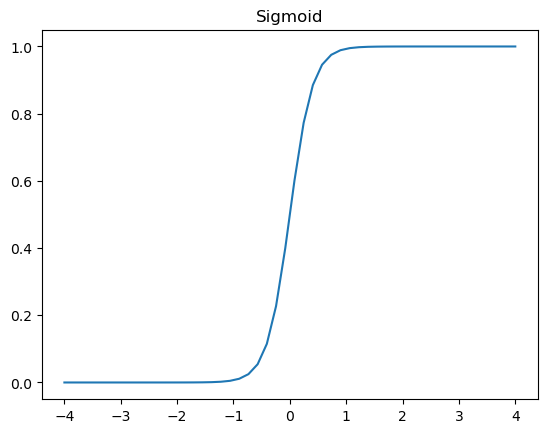

In [11]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return 1/(1+np.exp(x))

x = np.linspace(-4,4)
y = f(x*-5)

plt.plot(x,y)
plt.title("Sigmoid")

### Clasificacion con atributos
hay varias variables (dependientes o predictores) se puede predecir la clase

$\{x_1, x_2, ..., x_n\} → atributos$

$y → clase → \{0,1\}$

$$ \{x_1, x_2, ..., x_n\} → y ← clase$$


A estas variables se los combina con pesos cual permite determinar cual de estas variables son mas relevantes

$$\beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n = X_{r}$$

$$\hat{y} = P =\frac{1}{1+e^(X_r)} $$

un valor **P(probabilidad)** entre 0 y 1, existe un margen de error, dadon que se debe generar las probabilidades mas altas (~1) y los errores mas bajos

 ### MLE

 ### $$P(y|x) → max \sum_{i} \space log \space P(y_{i}|x_{i};h)$$

 $y_i:$ valores reales
 
 $\hat{y}:$ valores del modelo 

 Cual deberia ser la probabilidad o la verosimilitud que sea maxima cuando lleguen a coincidir $y_i$ y $\hat{y}$. Se hace calculando el promedio, y esta distribucion es un Bernoulli


$$ P = \begin{bmatrix}  p & y=1 \\ 1-p & y=0 \end{bmatrix}$$
$$P = p*1 + (1-p)*0$$
// Verosimilitud o likelihood
$$L = \hat{y}y + (1-\hat{y})(1-y)$$ 

El L (Likelihood) es bueno ya toma los valores maximos cuando $\hat{y}$~$y$ (similares)


Para $L$ de cada punto, se va ha aplicar 
- producto de logaritmo
- La Sumatoria de los $L$

$$\sum_i L_i = \sum_i \biggl( y_i log(\hat{y}_i) + (1-y_i) log(1- \hat{y}_i) \biggl)$$
Para maximizar $L$ es equivalente a minimizar $L$. -$L$ es la funcion que se busca optimizar en un problema de clasificacion, esta funcion se lo conoce como **Cross-Entropy (CE)**
$$max L = min (-L)$$

$$CE = - \sum_i \biggl( y_i log(\hat{y}_i) + (1-y_i) log(1- \hat{y}_i) \biggl) = Fun. \space de\space costo\space o\space error → Clasificacion$$